# HERA Data Part II : Calibration Exploration

**CHAMP Bootcamp**
<br>
**June 5, 2020**
<br>

In this demo we will explore HERA data, calibration solutions, and how to apply them to the data.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from hera_cal.io import HERAData, HERACal
from pyuvdata import utils as uvutils
import uvtools.plot as plotter

## 1) Load the un-calibrated data into a `HERAData` object

The data file is at `/lustre/aoc/projects/hera/nkern/CHAMP_Bootcamp/Lesson10_HERADataPartII/data/zen.2458116.24482.xx.HH.uvOCRU`

In [28]:
# load the raw data: this may take up to ~15 seconds...
hd = HERAData("/lustre/aoc/projects/hera/nkern/CHAMP_Bootcamp/Lesson10_HERADataPartII/" \
              "data/zen.2458116.24482.xx.HH.uvOCRU", filetype='miriad')
data, flags, _ = hd.read()

In [ ]:
# what data structure is `data`
print(type(data))

In [ ]:
# DataContainer is a pseudo-dictionary: print its keys
print(data.keys())

<IPython.core.display.Javascript object>


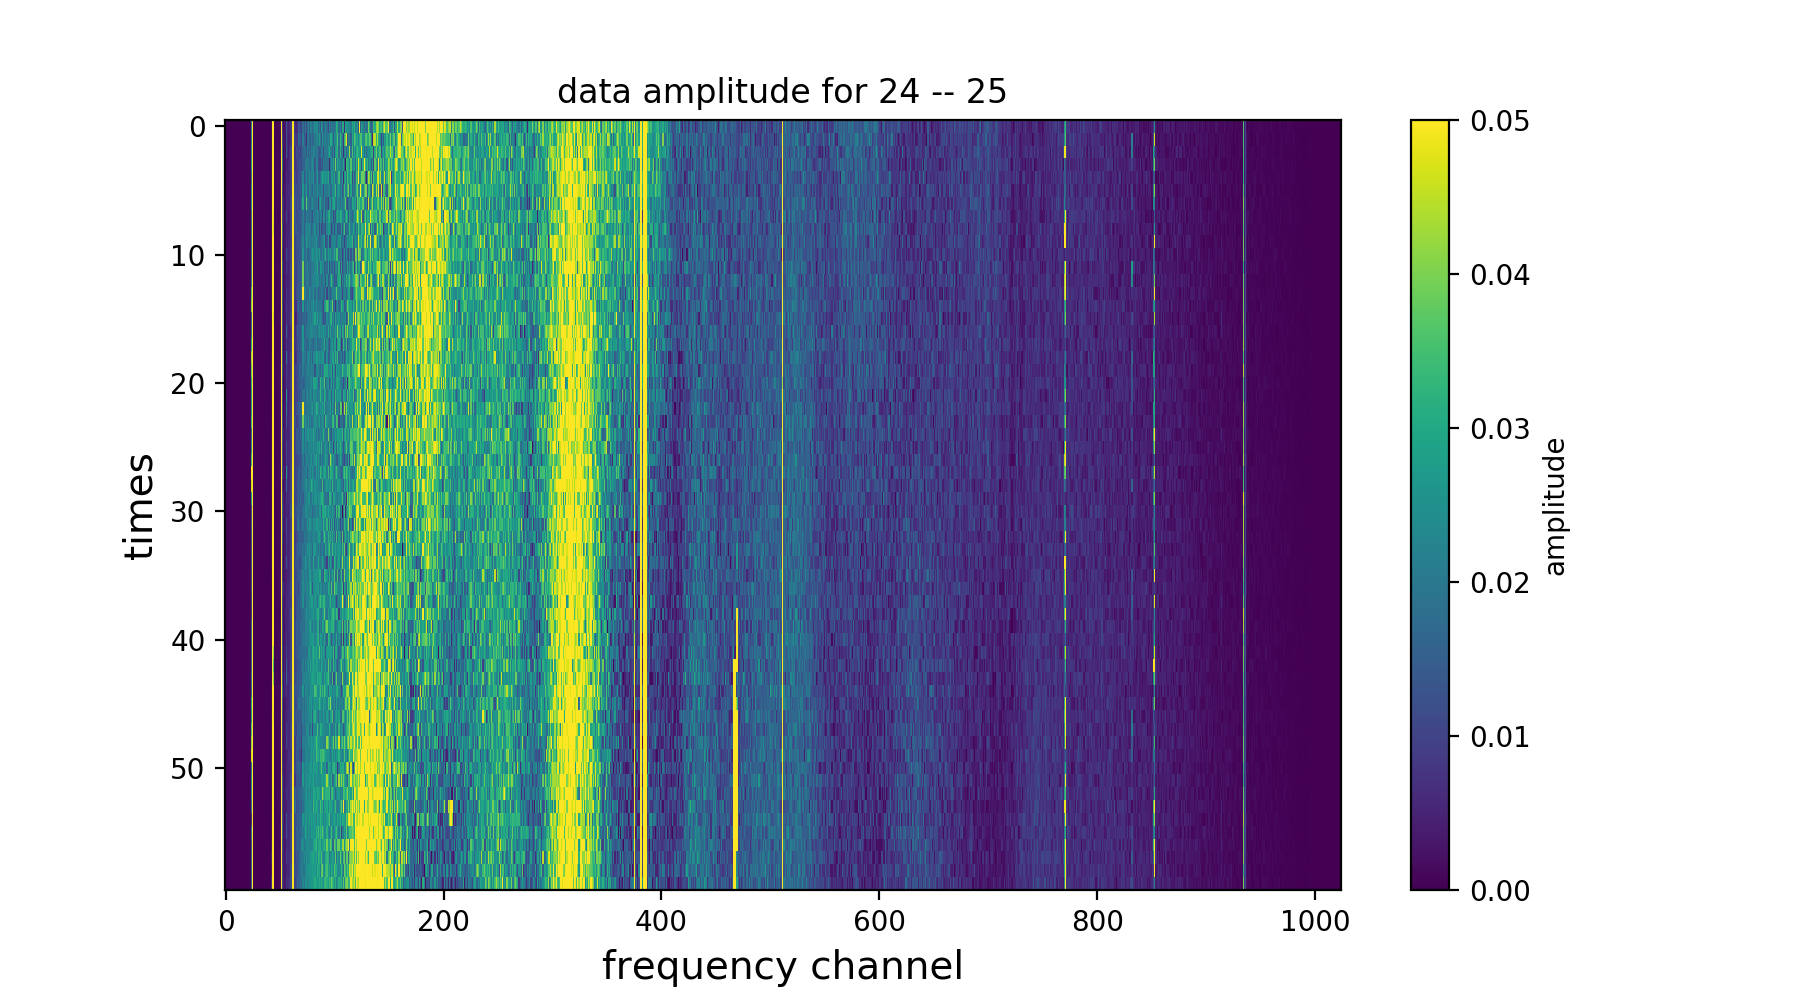

Text(0.5, 1.0, 'data amplitude for 24 -- 25')

In [4]:
# make a waterfall plot of data amplitude between antenna 24 & antenna 25
plt.figure(figsize=(9, 5))
baseline = (24, 25, 'ee')
plotter.waterfall(np.abs(data[baseline]), mode='real', mx=.05)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.colorbar(label='amplitude')
plt.title("data amplitude for 24 -- 25")

<IPython.core.display.Javascript object>


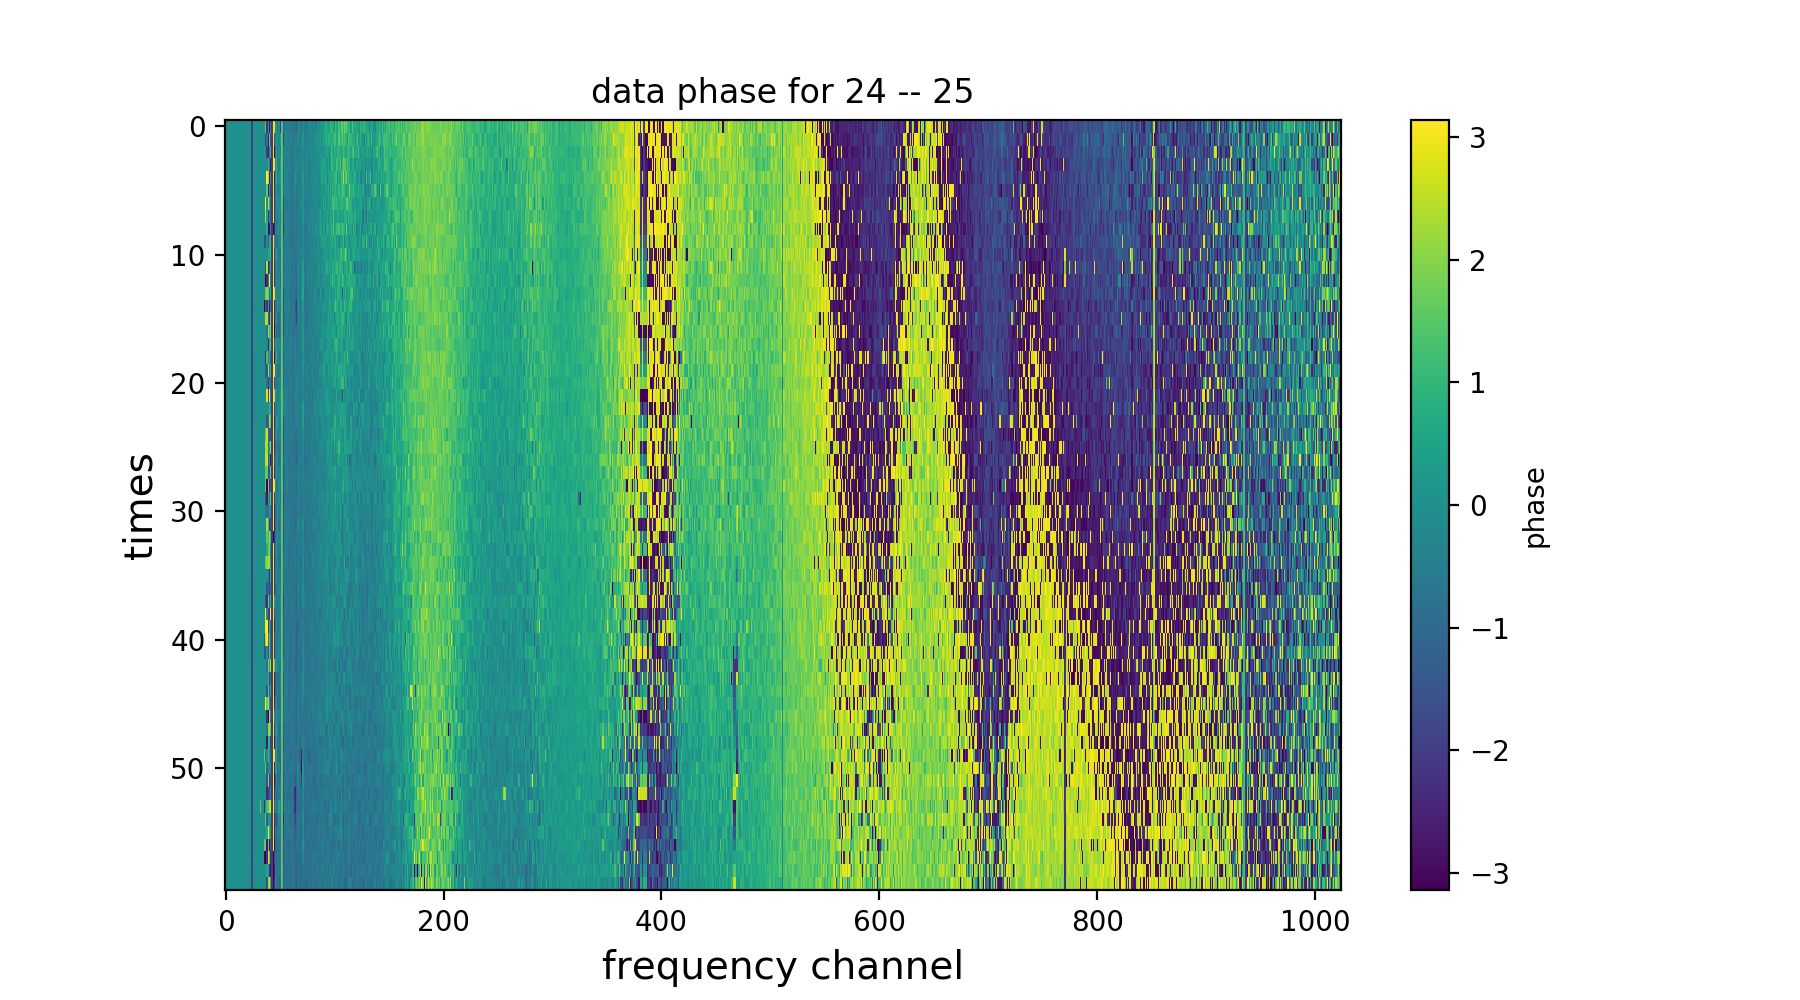

Text(0.5, 1.0, 'data phase for 24 -- 25')

In [5]:
# this time, make a waterfall plot of *visibility phase* between antenna 24 & antenna 25
plt.figure(figsize=(9, 5))
baseline = (24, 25, 'xx')
plotter.waterfall(np.angle(data[baseline]), mode='real')
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.colorbar(label='phase')
plt.title("data phase for 24 -- 25")

## start breakout for (2) & (3)

## 2) Load gain solutions into a `calfits` file

Use the `zen.2458116.24482.xx.HH.uv.abs.calfits` file.

In [6]:
# load the gain solutions: gains is a dictionary with antenna numbers as keys! Inspect it!
hc = HERACal("/lustre/aoc/projects/hera/nkern/CHAMP_Bootcamp/Lesson10_HERADataPartII/"
             "data/zen.2458116.24482.xx.HH.uv.abs.calfits")
gains, flags, _, _ = hc.read()

In [7]:
# print the gains keys
print(gains.keys())

odict_keys([(1, 'Jee'), (11, 'Jee'), (12, 'Jee'), (13, 'Jee'), (14, 'Jee'), (23, 'Jee'), (24, 'Jee'), (25, 'Jee'), (26, 'Jee'), (27, 'Jee'), (36, 'Jee'), (37, 'Jee'), (38, 'Jee'), (39, 'Jee'), (40, 'Jee'), (41, 'Jee'), (51, 'Jee'), (52, 'Jee'), (53, 'Jee'), (54, 'Jee'), (55, 'Jee'), (65, 'Jee'), (66, 'Jee'), (67, 'Jee'), (68, 'Jee'), (69, 'Jee'), (70, 'Jee'), (71, 'Jee'), (82, 'Jee'), (83, 'Jee'), (84, 'Jee'), (85, 'Jee'), (86, 'Jee'), (87, 'Jee'), (88, 'Jee'), (120, 'Jee'), (121, 'Jee'), (122, 'Jee'), (123, 'Jee'), (124, 'Jee'), (137, 'Jee'), (138, 'Jee'), (139, 'Jee'), (140, 'Jee'), (141, 'Jee'), (142, 'Jee'), (143, 'Jee')])


<IPython.core.display.Javascript object>


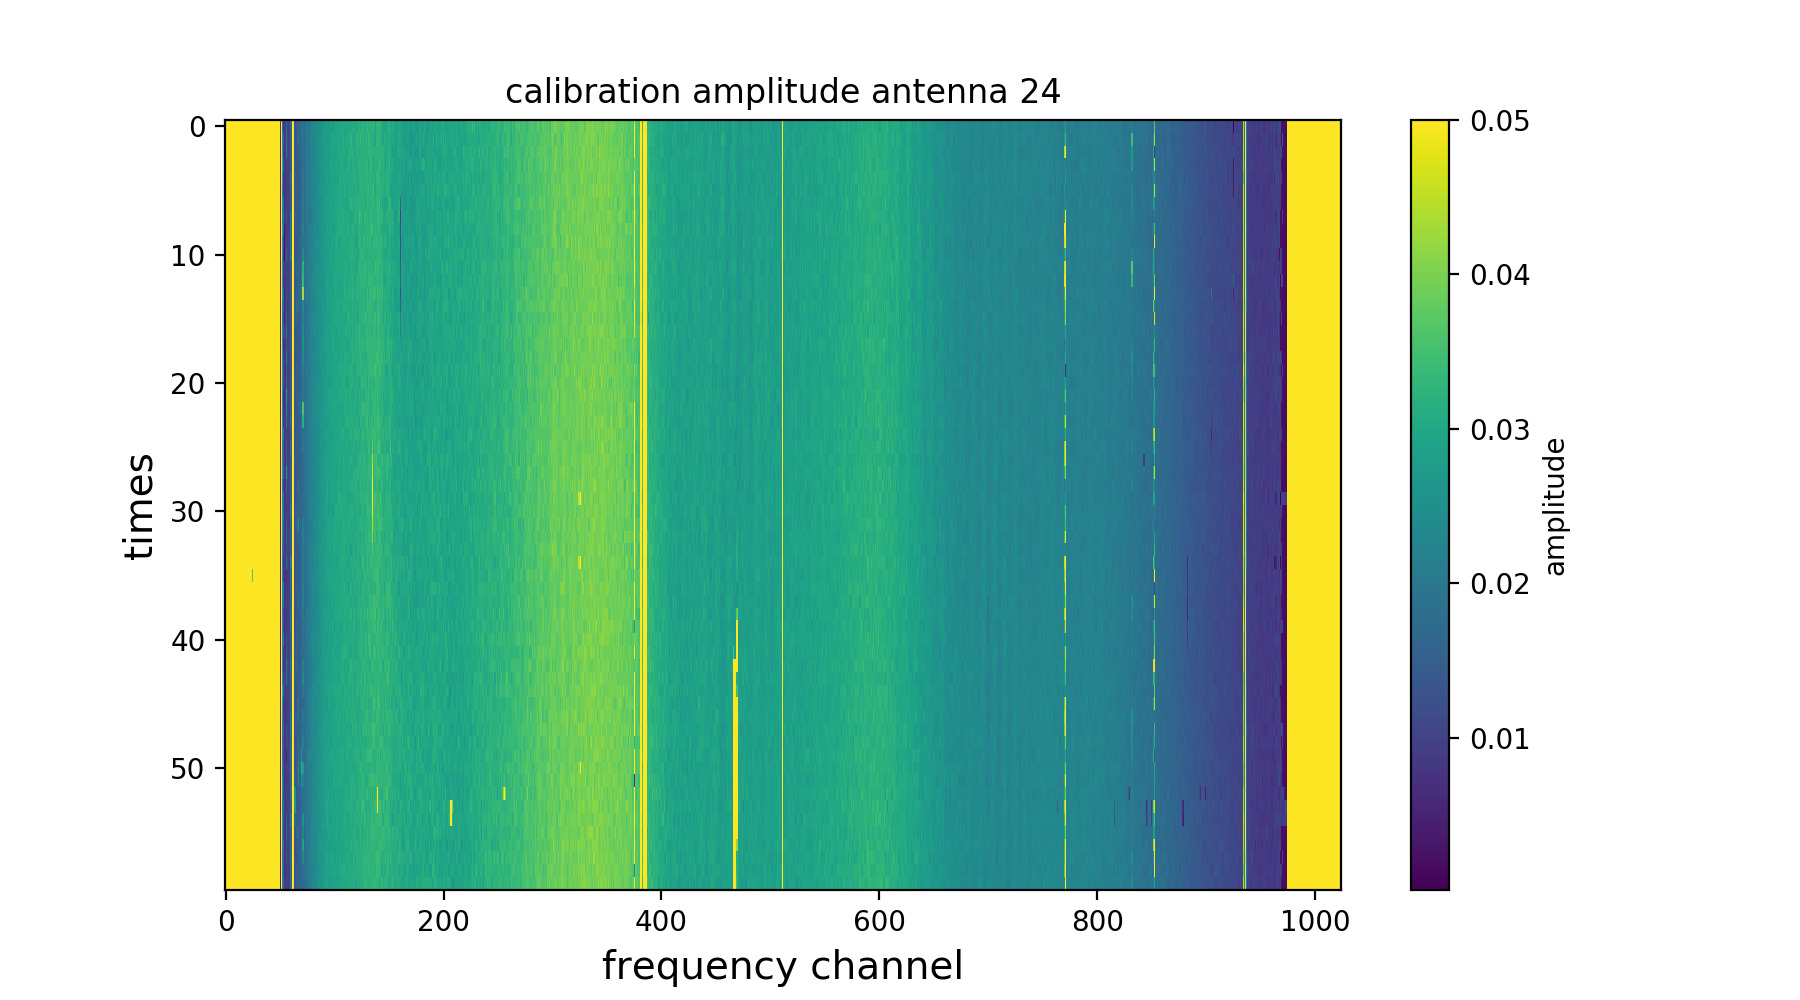

Text(0.5, 1.0, 'calibration amplitude antenna 24')

In [8]:
# make a waterfall plot of antenna 24 gain amplitude for "Jxx" polarization
plt.figure(figsize=(9, 5))
antenna = (24, 'Jee')
plotter.waterfall(np.abs(gains[antenna]), mode='real', mx=.05)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.colorbar(label='amplitude')
plt.title("calibration amplitude antenna 24")

In [9]:
# given that data[baseline] returns a 2D array of shape (Ntimes, Nfrequencies)
# how do I slice the array to get all times for just frequency channel 512?
data[baseline][:, 512]

array([-6.6413884e-03+0.01217937j, -7.6007848e-03+0.01420307j,
       -1.3130189e-02+0.0087204j , -7.2946544e-03+0.01204014j,
       -8.4886560e-03+0.01329994j, -6.6537862e-03+0.01389313j,
       -7.7705379e-03+0.00836372j, -1.1256220e-02+0.01427555j,
       -1.1571885e-02+0.0060854j , -8.1291217e-03+0.01400662j,
       -7.5893416e-03+0.00513172j, -8.7594986e-03+0.01031113j,
       -9.5472336e-03+0.00616264j, -5.3339005e-03+0.01383972j,
       -5.9757242e-03+0.0164547j , -8.2054138e-03+0.01828194j,
       -5.0344463e-03+0.01278591j, -5.1813130e-03+0.01267147j,
       -1.2814522e-02+0.00697994j, -4.5776372e-03+0.01364899j,
       -3.8242413e-04+0.01101017j, -1.2975693e-02+0.01159096j,
       -8.6793890e-03+0.01701927j, -9.5720310e-03+0.0115099j ,
       -3.7536623e-03+0.01261807j, -9.1714868e-03+0.01570988j,
       -2.0036695e-03+0.01200104j,  3.5591135e-03+0.0191927j ,
       -7.8592291e-03+0.00703049j, -3.0565280e-03+0.01572895j,
       -2.2125094e-04+0.01853466j, -9.5462805e-04+0.016

<IPython.core.display.Javascript object>


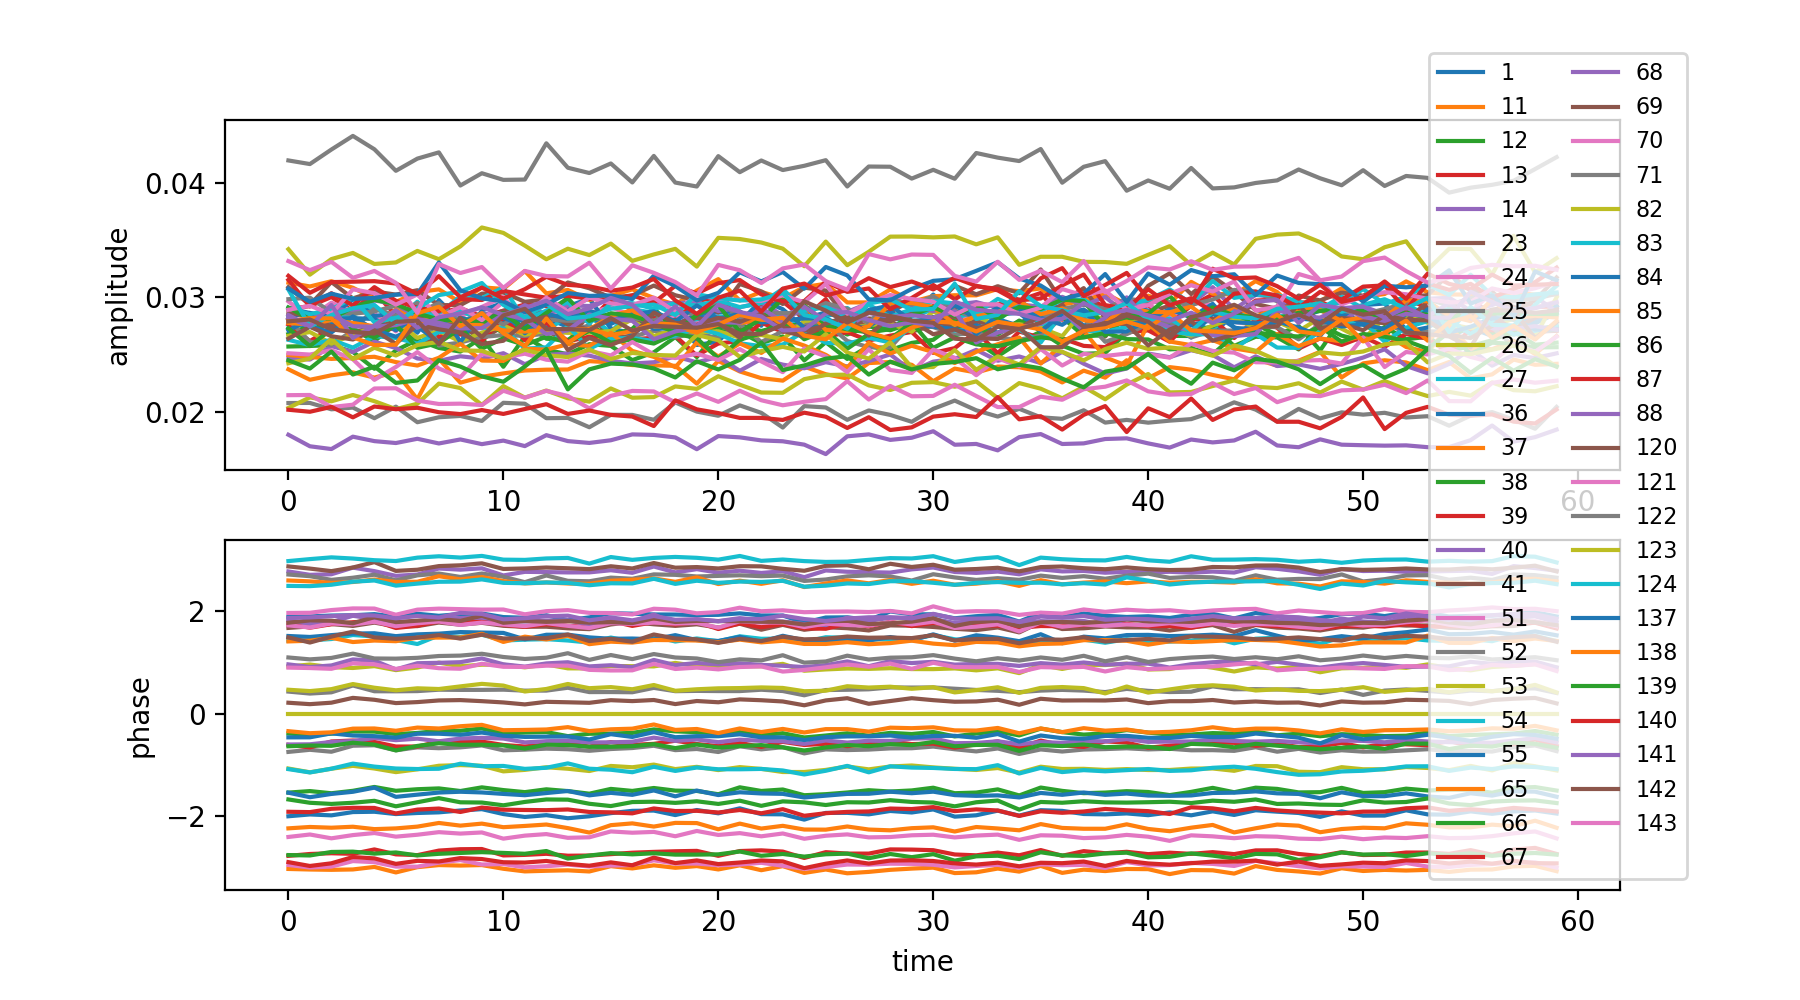

In [12]:
# make a line plot of all antenna gain amplitudes in one plot, and in another plot gain phases
# at frequency channel 512
# Hint 1: use a FOR loop over hc.ant_array

fig = plt.figure(figsize=(9, 5))

plt.subplot(2, 1, 2)
for ant in hc.ant_array:
    # plot antenna phases here
    plt.plot(np.angle(gains[(ant, 'Jee')])[:, 512])

plt.xlabel('time')
plt.ylabel("phase")
    
plt.subplot(2, 1, 1)
for ant in hc.ant_array:
    # plot antenna amplitudes here
    plt.plot(np.abs(gains[(ant, 'Jee')])[:, 512])

plt.ylabel("amplitude")
plt.legend(hc.ant_array, ncol=2, borderaxespad=-3, loc=0, fontsize=8)

How much does the gain amplitude vary over the course of the file?

Do certain antennas look different than others? Which ones? Hint: Try plotting just a few antennas to better distinguish them.

<IPython.core.display.Javascript object>


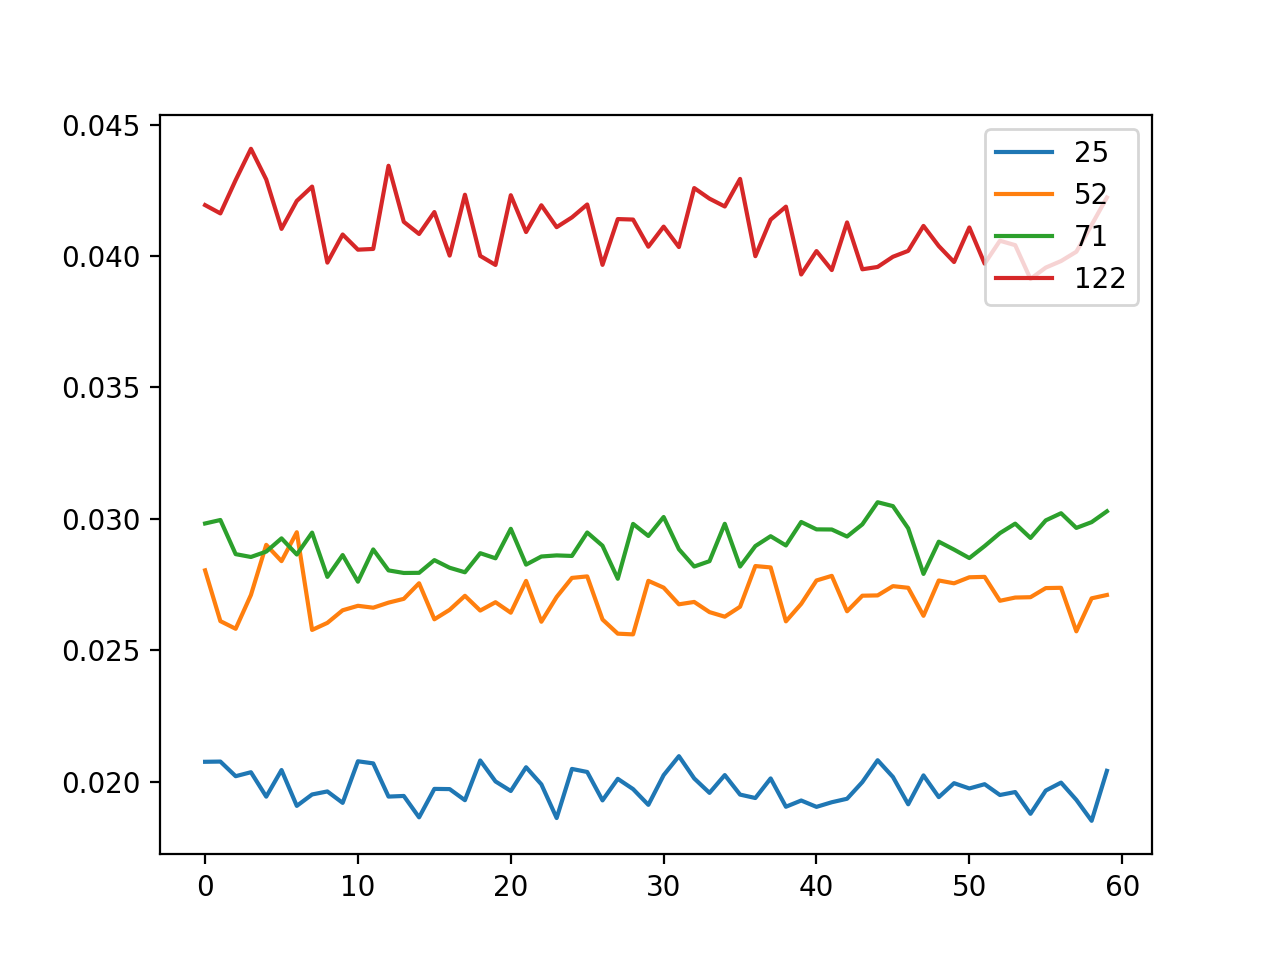

In [13]:
plt.figure()
plt.plot(np.abs(gains[(25, 'Jee')])[:, 512], label=25)
plt.plot(np.abs(gains[(52, 'Jee')])[:, 512], label=52)
plt.plot(np.abs(gains[(71, 'Jee')])[:, 512], label=71)
plt.plot(np.abs(gains[(122, 'Jee')])[:, 512], label=122)
plt.legend(fontsize=10)

<IPython.core.display.Javascript object>


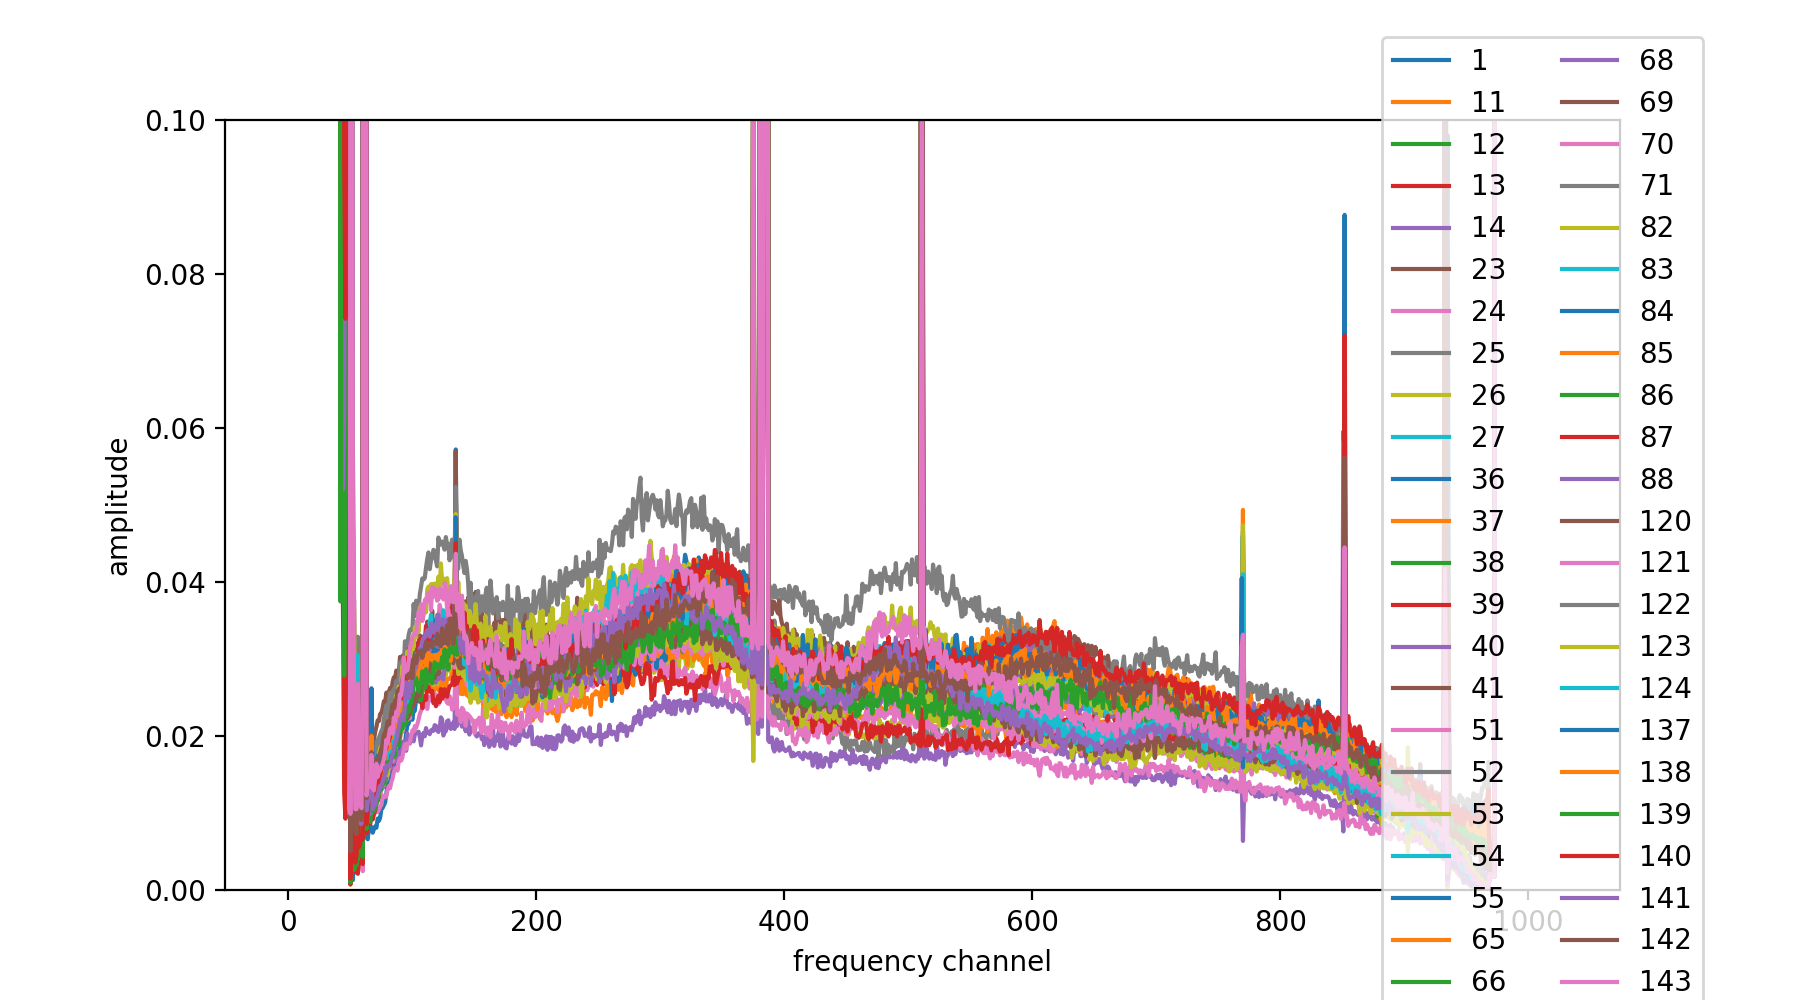

In [14]:
# make a line plot of all antenna gain amplitudes in one plot at time index 30
# Hint 1: use a FOR loop over hc.ant_array
# Hint 2: use plt.ylim(min, max) to change y-axis range

fig = plt.figure(figsize=(9, 5))

for ant in hc.ant_array:
    # plot antenna phases here
    plt.plot(np.abs(gains[(ant, 'Jee')])[30, :])
    
plt.ylim(0, 0.1)
plt.xlabel('frequency channel')
plt.ylabel('amplitude')
plt.legend(hc.ant_array, ncol=2, borderaxespad=-3, loc=1, fontsize=10)

What do you see in the gain amplitude across frequency? What might cause these features?

## 3) Load the model visibility

Use the `zen.2458116.24482.xx.HH.uvXRS2` file.

In [30]:
# load the model: this may take up to ~15 seconds
hd2 = HERAData('/lustre/aoc/projects/hera/nkern/CHAMP_Bootcamp/Lesson10_HERADataPartII/'
               'data/zen.2458116.24482.xx.HH.uvXRS2', filetype='miriad')
model, _, _ = hd2.read(bls=[(24, 25)])

<IPython.core.display.Javascript object>


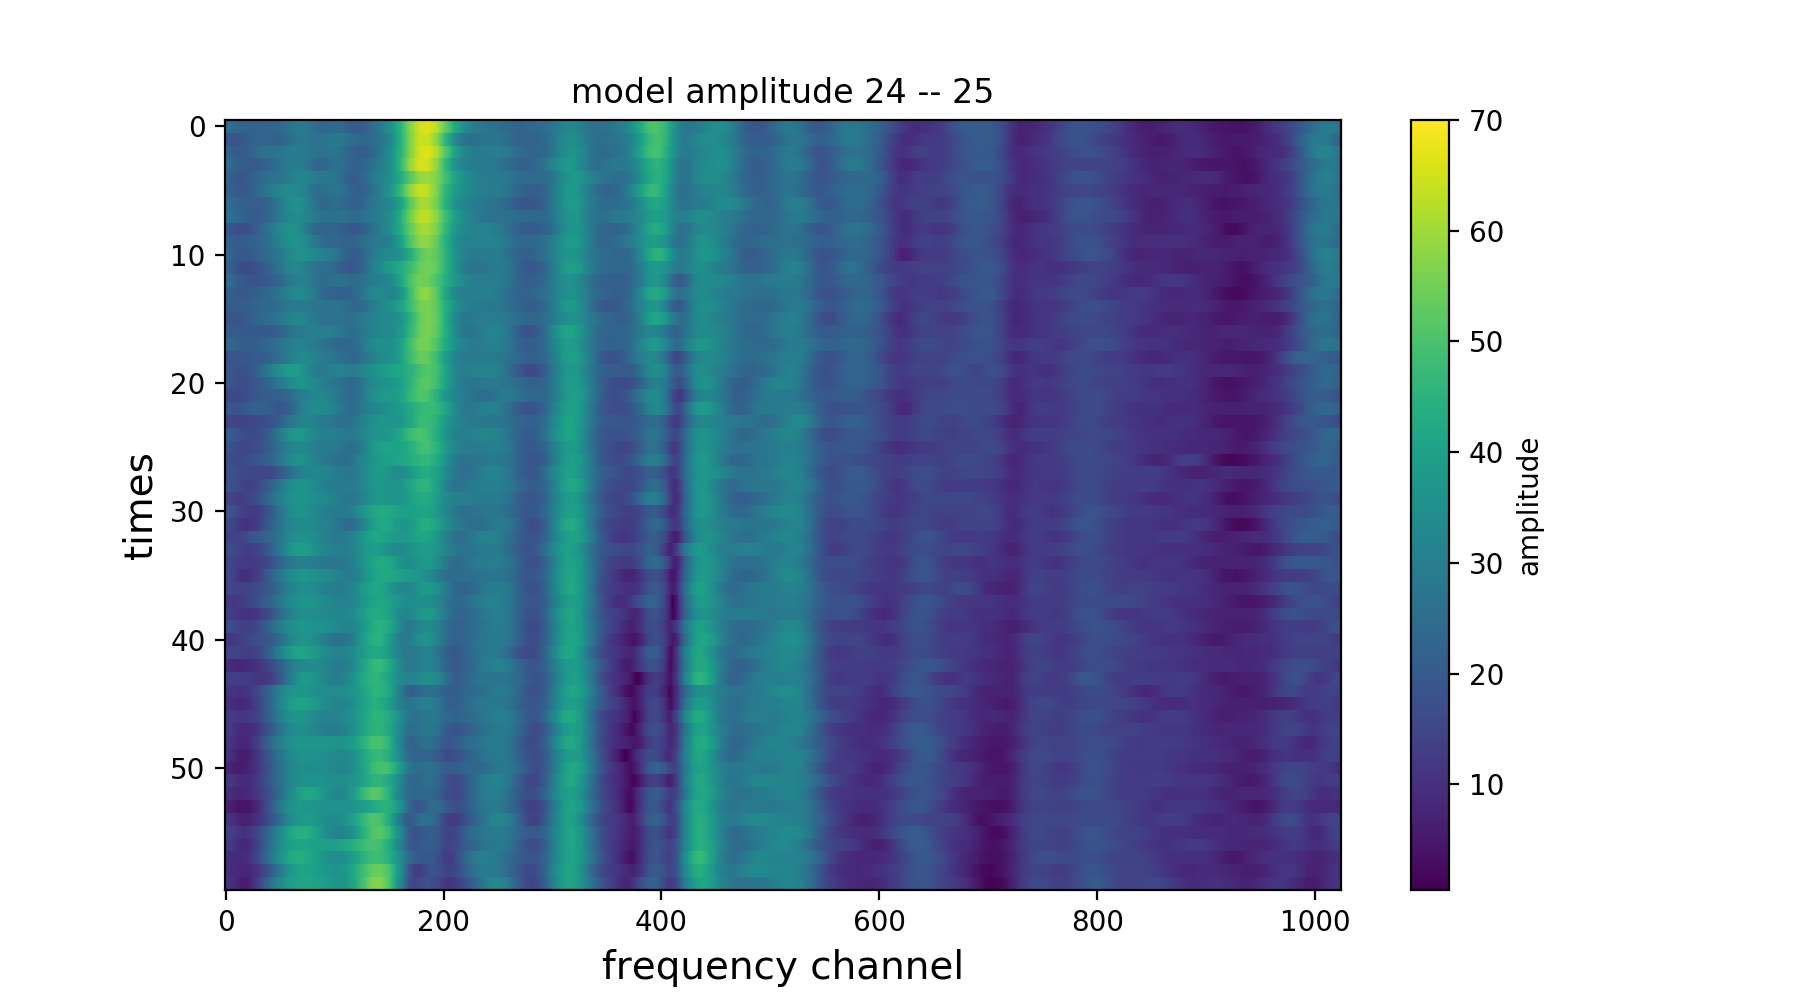

Text(0.5, 1.0, 'model amplitude 24 -- 25')

In [31]:
# make a waterfall plot of model amplitude between antenna 24 & antenna 25
plt.figure(figsize=(9, 5))
baseline = (24, 25, 'ee')
plotter.waterfall(np.abs(model[baseline]), mode='real', mx=70)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.colorbar(label='amplitude')
plt.title("model amplitude 24 -- 25")

What is different about the model visibility compared to the original data visibiltiy?

## 4) Apply the calibration solution to the data

Recall that the calibration equation reads:

\begin{align}
\Large V_{ij}^{\rm data} = g_ig_j^\ast V_{ij}^{\rm model}
\end{align}

such that we can calculate

\begin{align}
\Large V_{ij}^{\rm updated\ data} = V_{ij}^{\rm data} / (g_i g_j^\ast)
\end{align}

__Note:__ the conjugation $^\ast$ operation can be done using `np.conj(data)`

<IPython.core.display.Javascript object>


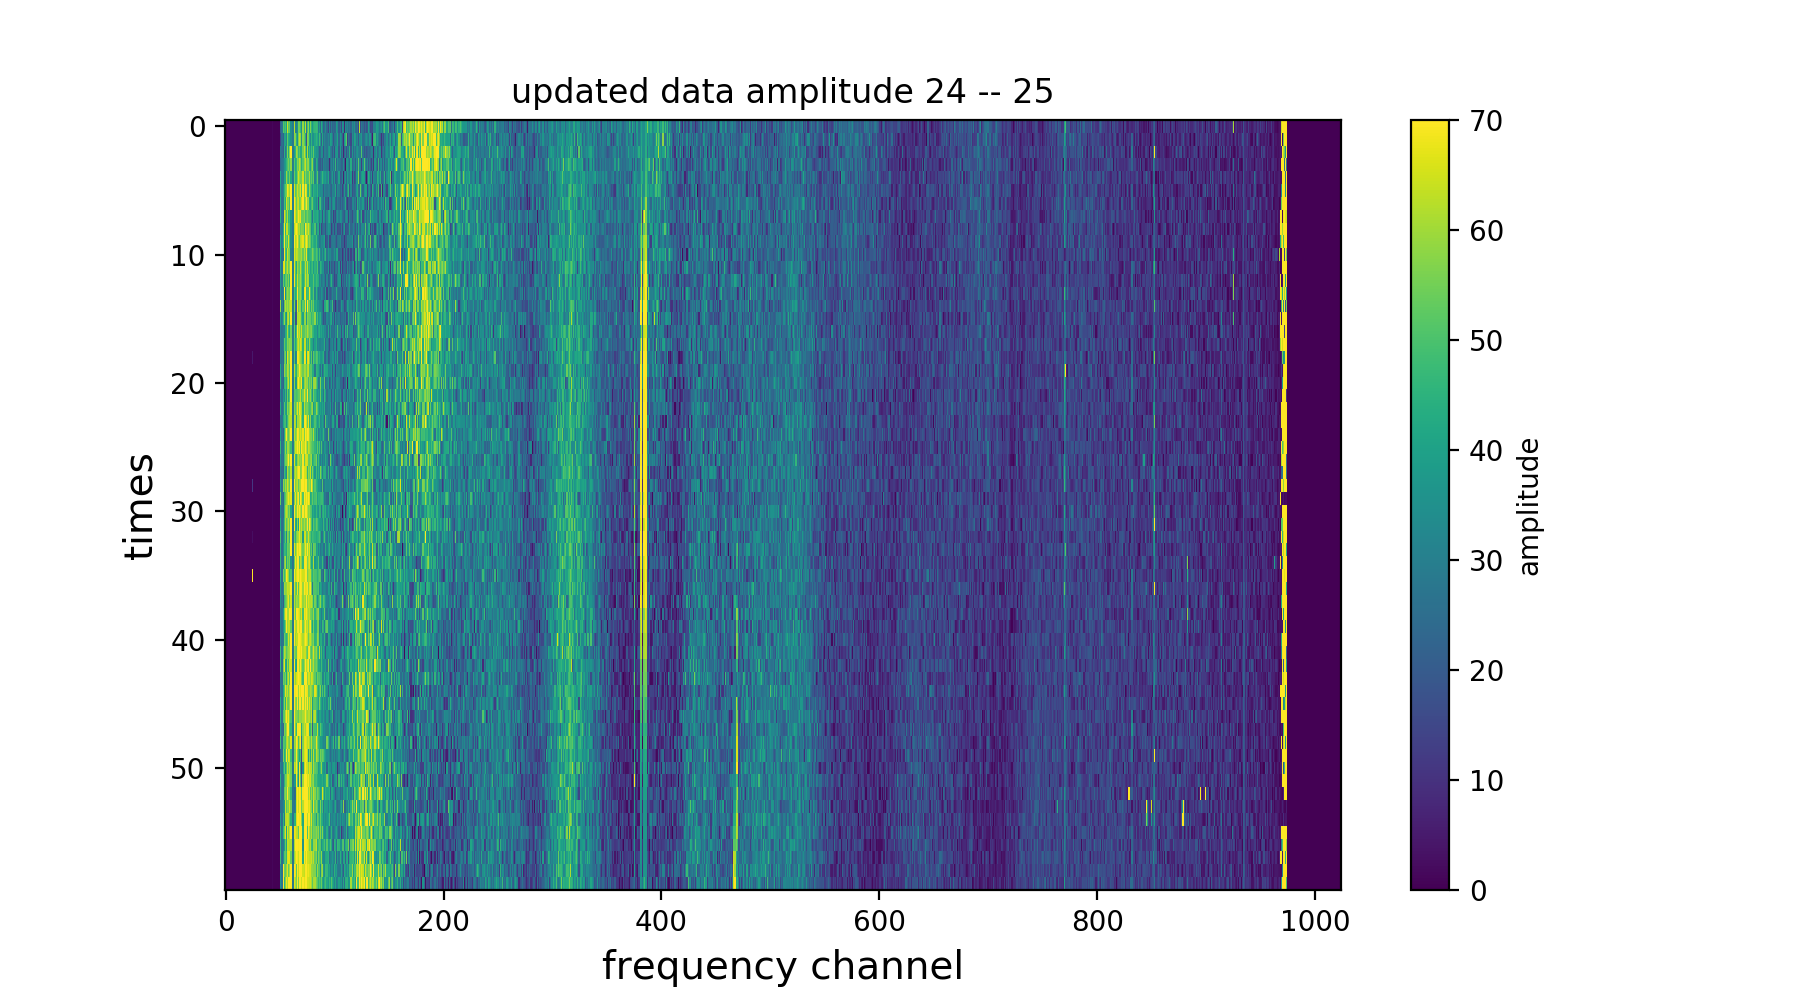

Text(0.5, 1.0, 'updated data amplitude 24 -- 25')

In [33]:
# apply calibration to V_24_25 and make a waterfall plot of updated data amplitude
d = data[(24, 25, 'ee')]
gg = gains[(24, 'Jee')] * np.conj(gains[(25, 'Jee')])
updated_data = d / gg

plt.figure(figsize=(9, 5))
plotter.waterfall(np.abs(updated_data), mode='real', mx=70)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.colorbar(label='amplitude')
plt.title("updated data amplitude 24 -- 25")

<IPython.core.display.Javascript object>


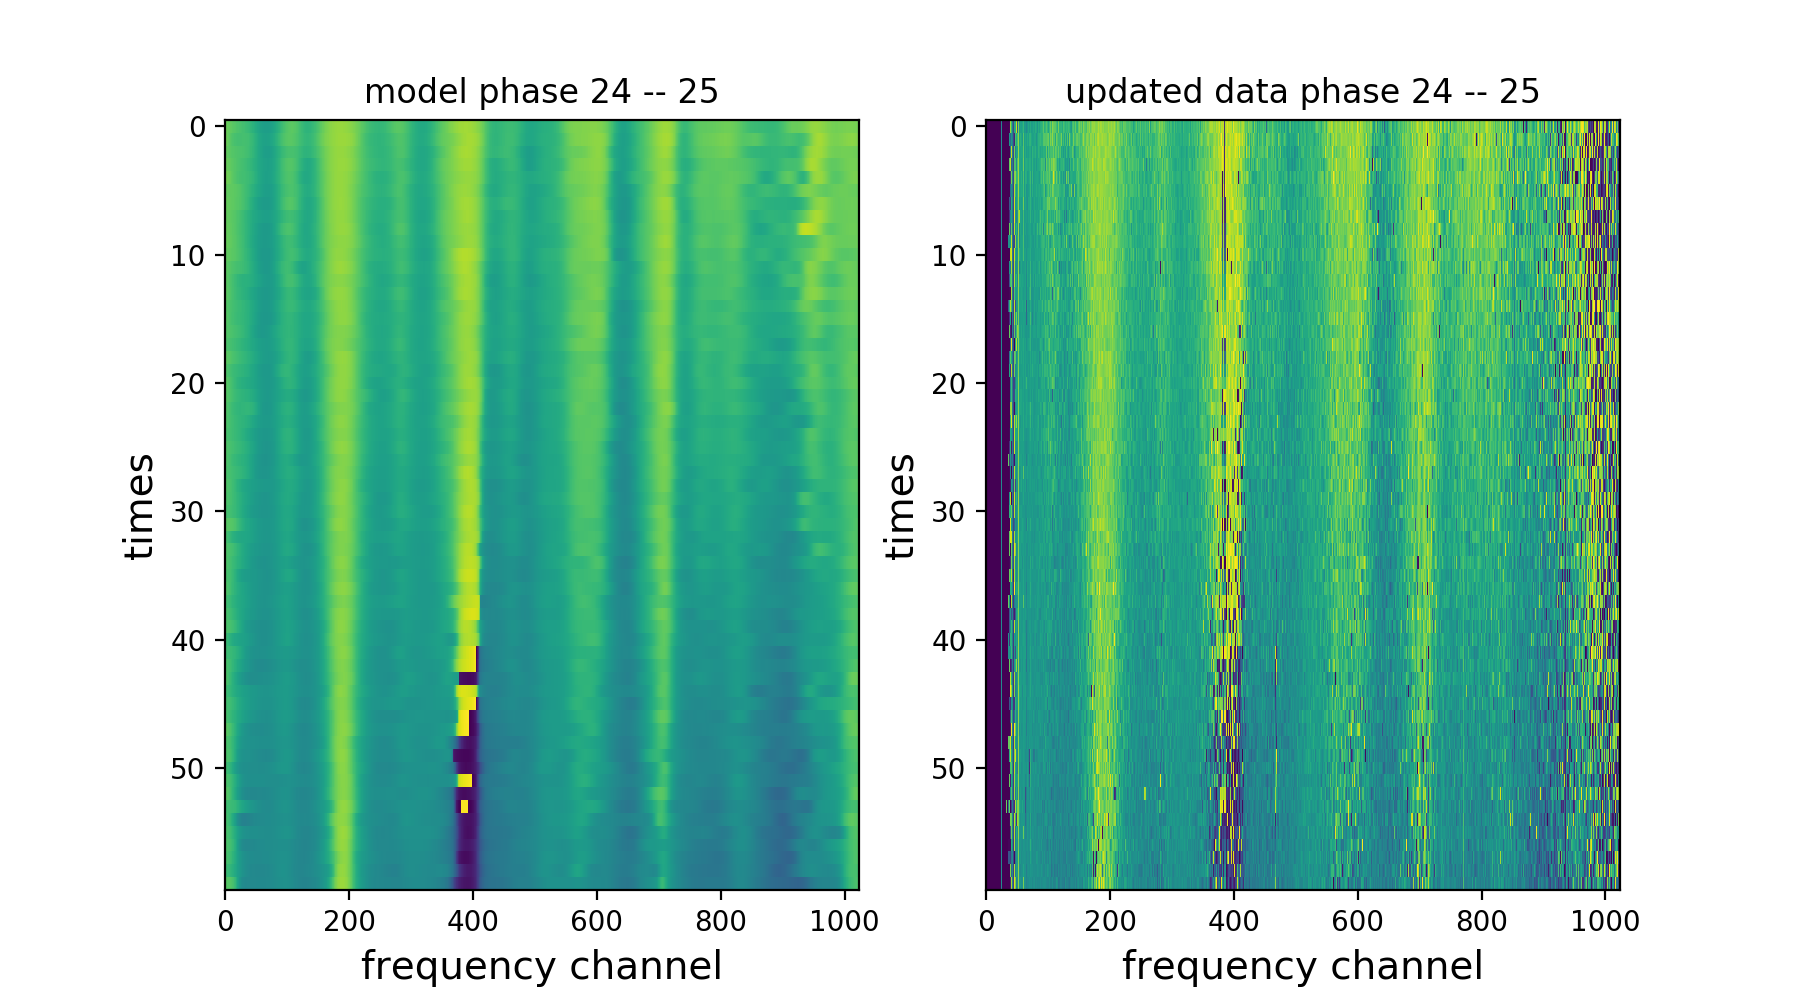

Text(0.5, 1.0, 'updated data phase 24 -- 25')

In [34]:
# plot model and updated data phase side-by-side
plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plotter.waterfall(np.angle(model[baseline]), mode='real', mx=None)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.title("model phase 24 -- 25")

plt.subplot(1, 2, 2)
plotter.waterfall(np.angle(updated_data), mode='real', mx=None)
plt.xlabel('frequency channel' , fontsize=14)
plt.ylabel('times' , fontsize=14)
plt.title("updated data phase 24 -- 25")


That's the end of the calibration demo! Hopefully you've gained some intuition for how calibration is done and applied to the data. Next we'll look to image the data after applying calibration!